In [21]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,\
    classification_report, confusion_matrix
 
# filter warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')
    

In [3]:
def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values 
    '''
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)

In [4]:
def classify_and_plot(X, y):
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

    # init vars
    n_neighbors = 5
    h           = .04  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
#         plt.legend()
        plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()
        fig.savefig(weights +'.png')
        
        
        # evaluate
        y_expected  = y_test
        y_predicted = clf.predict(X_test)

        # print results
        print('----------------------------------------------------------------------')
        print('Classification report')
        print('----------------------------------------------------------------------')
        print('\n', classification_report(y_expected, y_predicted))
        print('----------------------------------------------------------------------')
        print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
        print('----------------------------------------------------------------------')


In [5]:
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['Survived'] == 0]
    outcome_1 = data[data['Survived'] == 1]

    # init figure
    fig, axs = plt.subplots(9, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)
    names = list(data.columns)
    # plot densities for outcomes
    for column_name in names[1:]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.legend()
    plt.show()
    fig.savefig('densities.png')

In [6]:
data = pd.read_csv('../titanic/cleaned_train.csv')
data.shape

(889, 9)

In [7]:
names = list(data.columns)
names

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

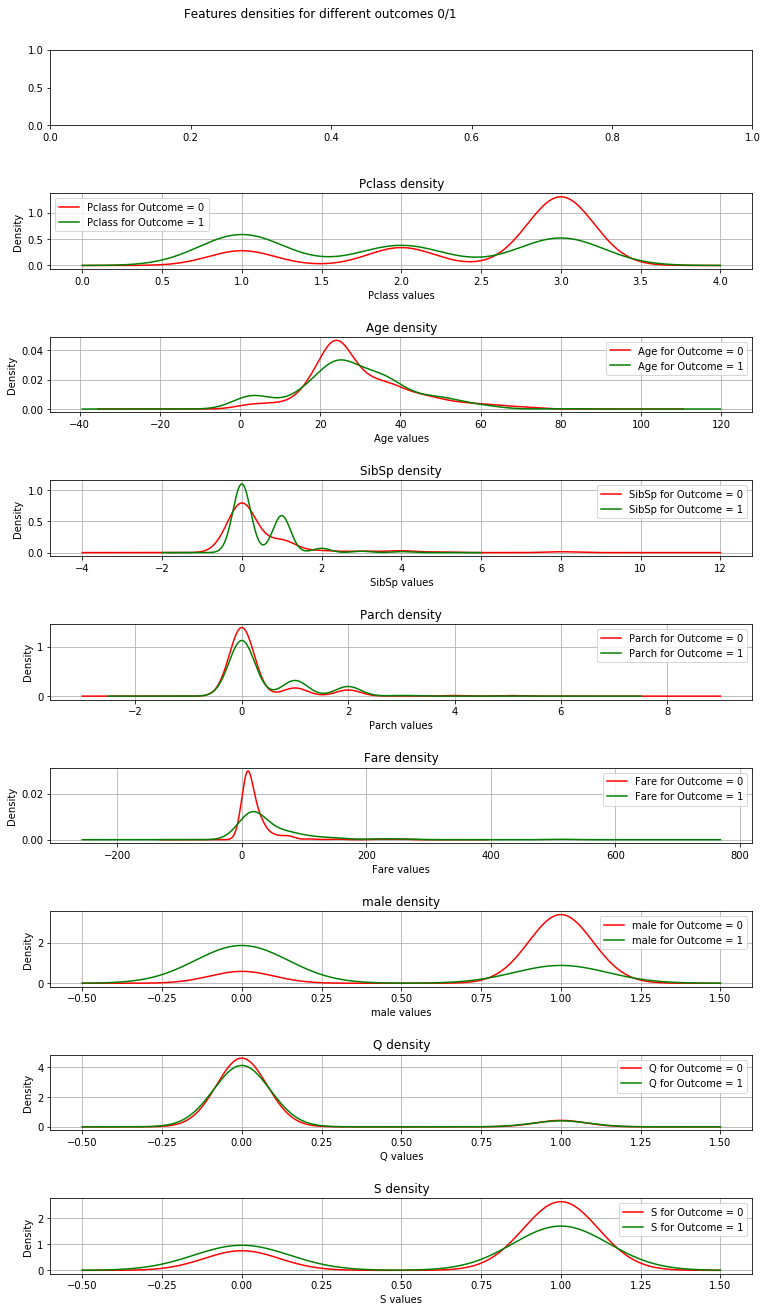

In [8]:
plot_densities(data)

In [9]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


In [10]:
names=list(data.columns)
names

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [11]:
rows_nbr = 889

In [12]:
data.columns[4]

'Parch'

In [13]:
data.columns[5]

'Fare'

In [14]:
data.columns[6]

'male'

In [15]:
data.columns[1]

'Pclass'

In [16]:
X_prime = np.array(data.iloc[:rows_nbr, [4,5]])
X = X_prime
y = np.array(data.iloc[:rows_nbr, 8])

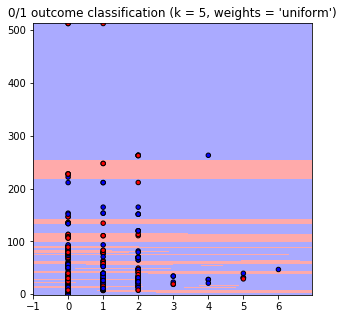

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.84      0.90      0.87        62

    accuracy                           0.81        89
   macro avg       0.78      0.75      0.76        89
weighted avg       0.80      0.81      0.80        89

----------------------------------------------------------------------
Accuracy = 0.809
----------------------------------------------------------------------
----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.92      0.92      0.92        62

    accuracy      

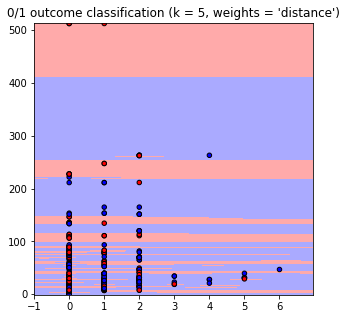

In [17]:
#X axis = 'Parch', y axis = 'fare'
classify_and_plot(X, y)

In [18]:
X_prime2 = np.array(data.iloc[:rows_nbr, [5, 4]])
X2 = X_prime2
y2 = np.array(data.iloc[:rows_nbr, 8])

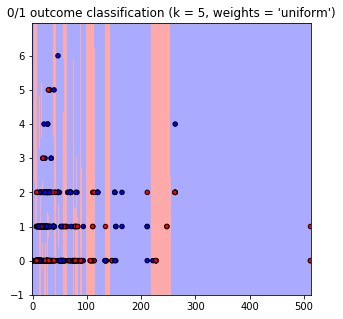

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.84      0.90      0.87        62

    accuracy                           0.81        89
   macro avg       0.78      0.75      0.76        89
weighted avg       0.80      0.81      0.80        89

----------------------------------------------------------------------
Accuracy = 0.809
----------------------------------------------------------------------
----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.92      0.92      0.92        62

    accuracy      

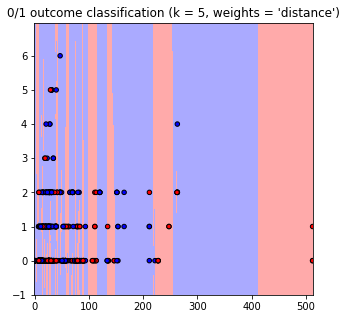

In [19]:
classify_and_plot(X2, y2)


In [20]:
X_prime3 = np.array(data.iloc[:rows_nbr, [1, 5]])
X3 = X_prime3
y3 = np.array(data.iloc[:rows_nbr, 8])

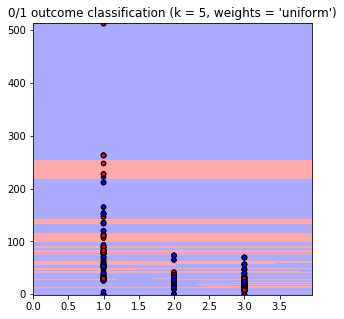

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.85      0.92      0.88        62

    accuracy                           0.83        89
   macro avg       0.81      0.77      0.79        89
weighted avg       0.83      0.83      0.83        89

----------------------------------------------------------------------
Accuracy = 0.831
----------------------------------------------------------------------
----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.94      0.95      0.94        62

    accuracy      

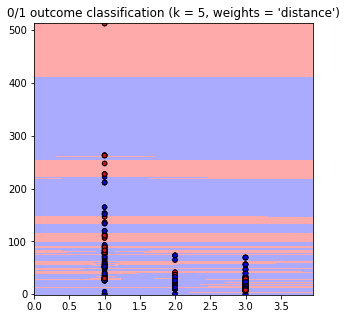

In [21]:
classify_and_plot(X3, y3)

In [36]:
newKNN = KNeighborsClassifier(weights='distance')
newKNN2 = KNeighborsClassifier(weights='distance')

In [38]:
my_data = data[["Fare","Pclass","Survived"]]
X = my_data[["Fare", "Pclass"]]
y = my_data[["Survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [39]:
my_data = data[["Fare","Parch","Survived"]]
X2 = my_data[["Fare", "Parch"]]
y2 = my_data[["Survived"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.10, random_state = 42)

In [40]:
newKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [42]:
newKNN2.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [47]:
predict3 = newKNN2.predict(X2_test)

In [14]:
import sys
sys.path.insert(0, "../titanic/")
import load_titanic_data
test_data = pd.read_csv("../titanic/cleaned_test.csv")

In [15]:
features = test_data[["Fare", "Pclass"]]
predict = newKNN.predict(features)

In [46]:
features2 = test_data[["Fare", "Parch"]]
predict2 = newKNN2.predict(features2)

In [18]:
predict_df = pd.DataFrame(data = predict, columns = ["Survived"])
id_col = test_data[["PassengerId"]]
submission = pd.concat([id_col,predict_df], axis = 1)
submission.astype("int32")
submission.to_csv("../submissions/KNN_Submission.csv", index=False)

In [19]:
predict_df2 = pd.DataFrame(data = predict2, columns = ["Survived"])
id_col = test_data[["PassengerId"]]
submission = pd.concat([id_col,predict_df], axis = 1)
submission.astype("int32")
submission.to_csv("../submissions/KNN_Submission2.csv", index=False)

In [48]:
y2_test

,Survived
280,0
434,1
39,1
417,0
584,1
803,1
342,0
834,0
580,1
536,1


In [57]:
type(predict3)

numpy.ndarray

In [58]:
type(y2_test)

numpy.ndarray

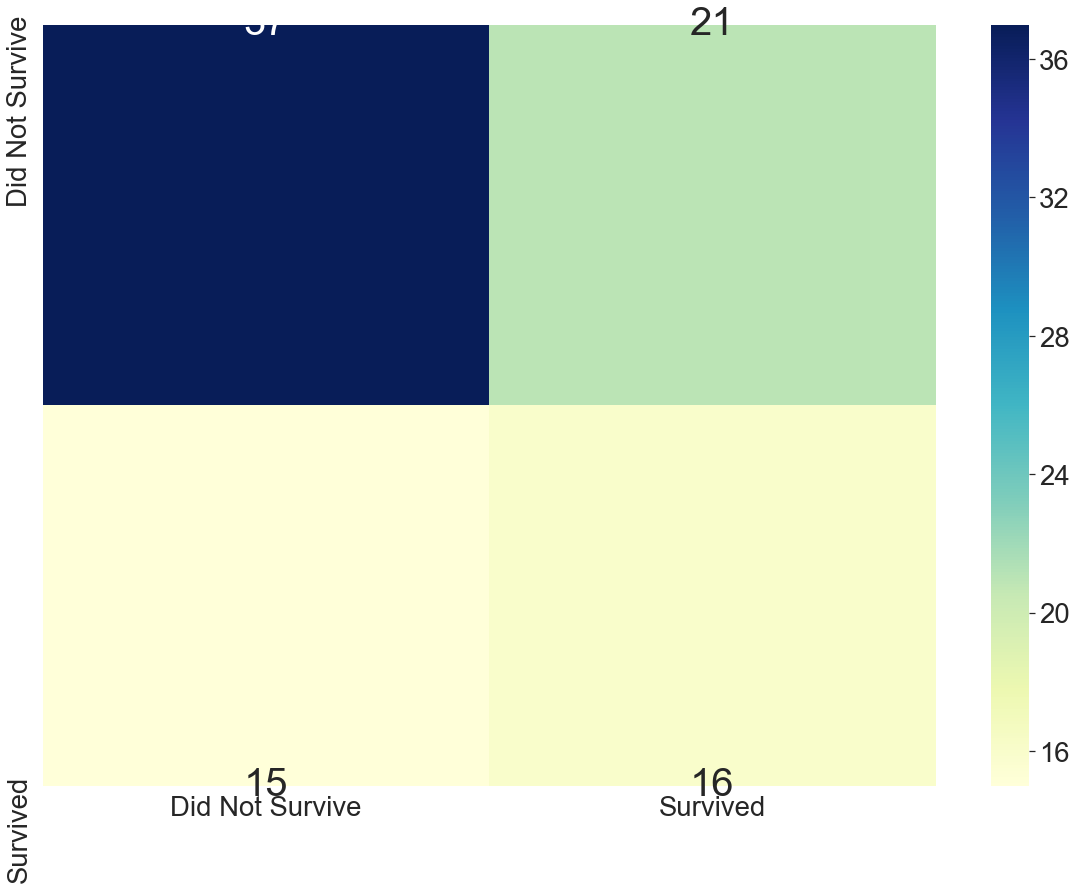

In [62]:
cm = confusion_matrix(y2_test, predict3)

cm_df = pd.DataFrame(cm, index = ["Did Not Survive", "Survived"], 
                             columns = ["Did Not Survive", "Survived"])
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu")
        
plt.show()

In [63]:
print("Here is the classification report of the KNN Model:")
print(classification_report(y2_test, predict3, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the KNN Model:
                 precision    recall  f1-score   support

Did Not Survive       0.71      0.64      0.67        58
       Survived       0.43      0.52      0.47        31

       accuracy                           0.60        89
      macro avg       0.57      0.58      0.57        89
   weighted avg       0.61      0.60      0.60        89

